In [196]:
# Package imports
import numpy as np
import copy
import matplotlib.pyplot as plt
from testCases_v2 import *
from public_tests import *
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [197]:
def initialize_parameters(n_x, n_h, n_y):
    W1 = np.random.randn(n_h,n_x)*0.01
    W2 = np.random.randn(n_y,n_h)*0.01
    b2 = np.zeros((n_y,1),dtype="float")
    b1 = np.zeros((n_h,1),dtype="float")
    
    # YOUR CODE ENDS HERE

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [198]:
def forward_propagation(X, parameters):

    # YOUR CODE STARTS HERE
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    Z1 = np.dot(W1,X)+b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2,A1)+b2
    A2 = sigmoid(Z2)
    
    
    assert(A2.shape == (1, X.shape[1]))
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

In [199]:
def backward_propagation(parameters, cache, X, Y):
    m = X.shape[1]
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    A1 = cache["A1"]
    A2 = cache["A2"]
    dz2 = A2-Y
    dW2 = 1/m*np.dot(dz2,A1.T)
    db2 = 1/m*np.sum(dz2,axis=1,keepdims=True)
    dz1 = W2.T*dz2*(1-np.power(A1,2))
    dW1 = 1/m*np.dot(dz1,X.T)
    db1 = 1/m *np.sum(dz1,axis=1,keepdims=True)
        
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

In [200]:
def update_parameters(parameters, grads, learning_rate = 1.2):
    W1 = copy.deepcopy(parameters["W1"])
    W2 = copy.deepcopy(parameters["W2"])
    b1 = parameters["b1"]
    b2 = parameters["b2"]
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    W1 = W1 - learning_rate*dW1
    W2 = W2 - learning_rate*dW2
    b1 = b1 - learning_rate*db1
    b2 = b2 - learning_rate*db2
        
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [201]:
# GRADED FUNCTION: nn_model

class nn_model:
    def __init__(self,X, Y, n_h, num_iterations = 10000, print_cost=False):
        self.n_h = n_h
        self.X =X
        self.Y = Y
        np.random.seed(3)
        self.num_iterations = num_iterations
        self.print_cost = print_cost
        self.n_x = X.shape[0]
        self.n_y = Y.shape[0]
    
    # np.random.seed(3)
    # n_x = layer_sizes(X, Y)[0]
    # n_y = layer_sizes(X, Y)[2]
    def train(self):
        parameters = initialize_parameters(self.n_x, self.n_h, self.n_y)
        for i in range(0, self.num_iterations):
                
            A2, cache = forward_propagation(self.X, parameters)
            grads = backward_propagation(parameters, cache, self.X, self.Y)
            parameters = update_parameters(parameters, grads)
  
        # Print the cost every 1000 iterations
        # if print_cost and i % 1000 == 0:
        #     print ("Cost after iteration %i: %f" %(i, cost))
        self.parameters = parameters
    def prediction(self,Xtest):
        A2, cache = forward_propagation(Xtest, self.parameters)
        predictions = np.round(A2)
    
        
        return predictions    

In [202]:
X, Y = load_planar_dataset()

In [203]:
parameters = nn_model(X, Y, n_h = 4, num_iterations = 10000, print_cost=True)

In [204]:
t_X = predict_test_case()[1]

In [205]:
parameters.train()

In [206]:
parameters.prediction(t_X)

array([[0., 0., 1.]])

Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

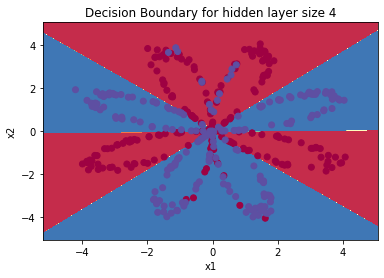

In [207]:
# Build a model with a n_h-dimensional hidden layer

# Plot the decision boundary
plot_decision_boundary(lambda x: parameters.prediction(x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))

In [208]:
predictions = parameters.prediction(X)
print ('Accuracy: %d' % float((np.dot(Y, predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size) * 100) + '%')

Accuracy: 90%


In [209]:
class nn:
    def __init__(self,X,Y,n_h,num_iterations = 100000, print_cost = False):
        self.n_h = n_h
        self.X = X
        self.Y = Y
        np.random.seed(3)
        self.num_iterations = num_iterations
        self.print_cost = print_cost
        self.n_x = X.shape[0]
        self.n_y = Y.shape[0]
    def train(self,learning_rate):
        self.w1 = np.random.randn(self.n_h,self.n_x)*0.01
        self.w2 = np.random.randn(self.n_y,self.n_h)*0.01
        self.b2 = np.zeros((self.n_y,1),dtype="float")
        self.b1 = np.zeros((self.n_h,1),dtype="float")
        m = self.X.shape[1]
        for i in range(0,self.num_iterations):
            z1 = np.dot(self.w1,self.X)+self.b1
            A1 = np.tanh(z1)
            z2 = np.dot(self.w2,A1)+self.b2
            A2 = sigmoid(z2)
            dz2 = A2-self.Y
            dw2 = 1/m*np.dot(dz2,A1.T)
            db2 = 1/m*np.sum(dz2,axis=1,keepdims=True)
            dz1 = self.w2.T*dz2*(1-np.power(A1,2))
            dw1 = 1/m*np.dot(dz1,self.X.T)
            db1 = 1/m *np.sum(dz1,axis=1,keepdims=True)
            self.w1 = self.w1 - learning_rate*dw1
            self.w2 = self.w2 - learning_rate*dw2
            self.b1 = self.b1 - learning_rate*db1
            self.b2 = self.b2 - learning_rate*db2
    def prediction(self,X_test):
        z1 = np.dot(self.w1,X_test)+self.b1
        A1 = np.tanh(z1)
        z2 = np.dot(self.w2,A1)+self.b2
        A2 = sigmoid(z2)
        return np.round(A2)



In [210]:
parameters = nn(X, Y, n_h = 4, num_iterations = 10000, print_cost=True)

In [211]:
parameters.train(1.2)

In [212]:
parameters.prediction(t_X)

array([[0., 0., 1.]])

In [213]:
predictions = parameters.prediction(X)
print ('Accuracy: %d' % float((np.dot(Y, predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size) * 100) + '%')

Accuracy: 90%
